In [2]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import copy

In [3]:
corpus = []
f = open('alice_in_wonderland.txt','r')
while(1):
    line =  f.readline()
    if len(line) == 0: break
    corpus.extend(line.split())
        
f.close()


def clean_word(word):
    word = word.lower()
    for punctuation in ['"',"'",'.',',','-','?','!',';',':','—','(',')','[',']']:
        
        word = ''.join(word.split(punctuation))
    return word

corpus = [clean_word(word) for word in corpus]

In [4]:

count = {}
next_word_count = {}

for k in xrange(len(corpus)-1):
    word = corpus[k]
    nextword = corpus[k+1]
    if word not in count.keys():
        count[word] = 1
        next_word_count[word] = {}
    else:
        count[word] += 1
      
    
    if nextword not in next_word_count[word].keys():
        next_word_count[word][nextword] = 1
    else:
        next_word_count[word][nextword] += 1
    
pickle.dump([count, next_word_count],open('alice_parsed.pkl','wb'))


they 127
said 462
is 102
it 526
in 367
the 1638
had 178
alice 385
for 153
this 134
down 102
was 357
so 151
not 144
she 537
little 129
that 276
and 846
on 193
of 509
her 248
with 181
as 262
at 209
you 360
all 179
to 721
very 144
what 136
a 632
its 111
be 146
out 113
one 101
i 401
but 164
he 120
{'and': 2, 'blew': 2, 'cried': 1, 'sends': 2, 'angrily': 1, 'hurried': 1, 'say': 2, 'in': 2, 'actually': 1, 'trotting': 1, 'as': 1, 'just': 1, 'began': 1, 'noticed': 1, 'started': 1, 'was': 2, 'whispered': 1, 'returning': 1, 'read': 2, 'who': 2, 'but': 1, 'it': 1, 'jumping': 1, 'coming': 1, 'put': 1, 'with': 3, 'hastily': 1, 'i': 1, 'interrupted': 1, 'she': 1, 'engraved': 1, 'asked': 1, 'came': 2}
{'replied': 9, 'all': 1, 'looked': 8, 'reeling': 1, 'soon': 2, 'indignantly': 3, 'its': 2, 'whose': 1, 'swallowing': 1, 'thinking': 1, 'with': 2, 'itll': 1, 'folded': 1, 'knew': 1, 'to': 9, 'only': 2, 'glanced': 1, 'surprised': 1, 'gave': 1, 'then': 2, 'flinging': 1, 'desperately': 1, 'very': 6, 'every'

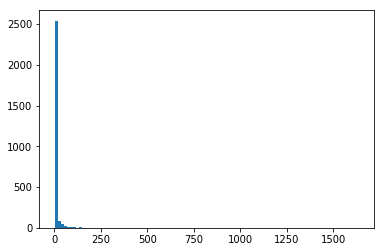

In [5]:
data = pickle.load(open('alice_parsed.pkl','rb'))
count, next_word_count = data[0], data[1]
plt.hist( count.values(),100)

#a sampling of most common words
for k,v in count.items():
    if v > 100:
        print k, v
        
#Most likely words to come after 'rabbit'
print next_word_count['rabbit']
print next_word_count['alice']


In [6]:
def predict(word, topk):
    total_corpus_size = sum(count.values())
    candidate_next_words = copy.deepcopy(next_word_count[word])
    total_next_words = sum(candidate_next_words.values())

    for k,v in candidate_next_words.items():
        candidate_next_words[k] = v / (total_next_words+0.) * count[k] / (total_corpus_size+0.)
    candidate_counts = np.sort(candidate_next_words.values())[::-1]
    if topk > len(candidate_counts)-1:
        return candidate_next_words.keys()
    thresh = candidate_counts[topk]
    return [k for k,v in candidate_next_words.items() if v > thresh]

print predict('a',1)
print predict('the',1)
print predict('splendidly',1)
print predict('exclaimed',1)


['little']
['queen']
['dressed']
['alice']


In [10]:
word_list = count.keys()
V = len(word_list)
cooccurance = np.zeros((len(word_list),len(word_list)))

total_corpus_size = sum(count.values())


for word,next_word in next_word_count.items():
    k = word_list.index(word)
    total_next_words = sum(next_word.values())
    for nw, v in next_word.items():
        j = word_list.index(nw)
        cooccurance[k,j] =  v / (total_next_words+0.) * count[nw] / (total_corpus_size+0.)

def predict2(word, topk):
    k = word_list.index(word)
    candidate_counts = cooccurance[k,:]
    candidate_counts_idx = np.argsort(candidate_counts)[::-1]
    
    candidate_counts_idx = candidate_counts_idx[np.greater(candidate_counts[candidate_counts_idx],0)]
    
    return [word_list[k] for k in list(candidate_counts_idx[:topk])]
    
print predict2('alice',5)
print predict2('large',5)
print predict2('said',5)
print predict2('a',5)
print predict2('the',5)
print predict2('to',5)

def run_string(starter_word, maxiter):
    word = starter_word
    print word,
    for iter in xrange(maxiter):
        #word = predict(word,1)[0]
        distribution = cooccurance[word_list.index(word),:]
        distribution = distribution / sum(distribution)
        next_idx = np.random.choice(range(V),p=distribution)
        word = word_list[next_idx]
        print word,
    print
run_string('a',100)

['and', 'the', 'to', 'was', 'said']
['a', 'she', 'as', 'in', 'one']
['the', 'alice', 'to', 'and', 'in']
['little', 'very', 'great', 'large', 'long']
['queen', 'king', 'mock', 'gryphon', 'hatter']
['the', 'alice', 'be', 'her', 'a']
a little the dormouse said alice she was that ever to the other and she was looking at the soldiers had the mouse to the hatter i think that there was the very said the rabbit it said the hatter said to know the queen said to the dormouse the cook and the sounds of the king that the little alice the mock turtle and the next the mock turtle to herself in the next to the king the hatter i see said the baby the jury not in the little the the dormouse again the king the dormouse the white
